First Position Competitor's Code

Credit: tatudoug

In [110]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import copy
from sklearn.metrics import r2_score
import random
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.matlib 
from sklearn.model_selection import StratifiedKFold
from scipy.stats import hmean
from sklearn import metrics

In [77]:
train_data = pd.read_csv('football_av_train.csv')
test_data = pd.read_csv('football_av_test.csv')

print(train_data.shape)
print(test_data.shape)

(20453, 800)
(8774, 799)


In [78]:
nn = list(train_data)

In [79]:
nn[0:5]

['row_id', 'scout_id', 'rating_num', 'winner', 'team']

In [80]:
nn.remove('rating_num')

In [81]:
f = train_data[nn].nunique()
ff = test_data[nn].nunique()

In [82]:
f

row_id                            20453
scout_id                             21
winner                                3
team                                  2
competitionId                        10
                                  ...  
team2_defensive_derived_var_15     2798
team2_offensive_derived_var_16     3624
team2_defensive_derived_var_17     1387
team2_offensive_derived_var_18     3509
team2_offensive_derived_var_19      609
Length: 799, dtype: int64

In [83]:
kk = 0
for x in nn:
    print(f[x], ' ', x, ' ', ff[kk], 'k: ', kk-1)
    if (f[x]<10) & (f[x]>0):
        print(train_data[x].unique())
        print(test_data[x].unique())
    kk = kk+1

20453   row_id   8774 k:  -1
21   scout_id   19 k:  0
3   winner   3 k:  1
['winner' 'loser' 'draw']
['draw' 'loser' 'winner']
2   team   2 k:  2
['team1' 'team2']
['team1' 'team2' nan]
10   competitionId   10 k:  3
22   player_position_1   22 k:  4
22   player_position_2   22 k:  5
39   player_height   42 k:  6
46   player_weight   45 k:  7
6   player_general_var_0   6 k:  8
[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.2 0.4 0.6 0.8 1. ]
2   player_general_var_1   2 k:  9
[0 1]
[0 1]
101   player_general_var_2   101 k:  10
61   player_general_var_3   35 k:  11
93   player_general_var_4   96 k:  12
4   player_general_var_5   5 k:  13
[0.   0.25 0.5  0.75]
[0.   0.25 0.5  0.75 1.  ]
6   player_positional_raw_var_0   5 k:  14
[0.         0.16666667 0.33333333        nan 0.5        1.
 0.66666667]
[0.16666667 0.                nan 0.33333333 0.5        0.66666667]
5   player_positional_raw_var_1   3 k:  15
[0.   0.5  0.25  nan 0.75 1.  ]
[0.   0.25  nan 0.5 ]
5   player_positional_raw_var_2   5 k:  1

[0.      nan 1.    0.5   0.2   0.333 0.25  0.667 0.143]
4   player_other_ratio_var_5   4 k:  218
[0.    1.      nan 0.667 0.5  ]
[0.   1.    nan 0.25 0.5 ]
84   player_other_ratio_var_6   65 k:  219
1   player_other_ratio_var_7   1 k:  220
[nan  0.]
[ 0. nan]
67   player_defensive_ratio_var_8   47 k:  221
188   player_other_ratio_var_9   152 k:  222
114   player_other_ratio_var_10   91 k:  223
513   player_other_ratio_var_11   472 k:  224
54   player_offensive_ratio_var_12   45 k:  225
13   player_offensive_ratio_var_13   12 k:  226
9   player_other_ratio_var_14   7 k:  227
[  nan 0.    1.    0.333 0.5   0.6   0.667 0.75  0.25  0.4  ]
[  nan 1.    0.    0.333 0.5   0.667 0.8   0.25 ]
27   player_other_ratio_var_15   33 k:  228
9   player_defensive_ratio_var_16   7 k:  229
[  nan 0.    1.    0.333 0.5   0.6   0.25  0.667 0.8   0.75 ]
[  nan 1.    0.    0.5   0.667 0.333 0.25  0.2  ]
40   player_defensive_ratio_var_17   39 k:  230
19   player_other_ratio_var_18   14 k:  231
28   player_o

[0.         0.33333333 0.11111111        nan 0.22222222 0.44444444
 0.55555556 0.88888889 0.66666667 0.77777778]
[0.22222222 0.11111111 0.         0.55555556 0.33333333        nan
 0.44444444 0.66666667 0.88888889 0.77777778]
75   team1_other_raw_var_69   77 k:  532
41   team1_other_raw_var_70   38 k:  533
65   team1_defensive_raw_var_71   61 k:  534
0   team1_other_raw_var_72   0 k:  535
87   team1_other_raw_var_73   85 k:  536
78   team1_other_raw_var_74   78 k:  537
59   team1_other_raw_var_75   56 k:  538
75   team1_other_raw_var_76   70 k:  539
921   team1_offensive_raw_var_77   821 k:  540
9   team1_other_raw_var_78   9 k:  541
[0.    0.375 0.25  0.5     nan 0.625 0.125 0.75  1.    0.875]
[0.625 0.5   0.375 0.25  0.125 0.      nan 0.75  0.875 1.   ]
3   team1_other_raw_var_79   3 k:  542
[0.  0.5 nan 1. ]
[0.  0.5 nan 1. ]
13   team1_other_raw_var_80   12 k:  543
11   team1_other_raw_var_81   11 k:  544
0   team1_other_raw_var_82   0 k:  545
1424   team1_other_raw_var_83   1230 k

In [84]:
nomes = list(train_data)

nomes.remove('rating_num')
nomes.remove('row_id')

# no values vars

nomes.remove('team1_other_raw_var_19')
nomes.remove('team1_other_raw_var_31')
nomes.remove('team1_other_raw_var_33')
nomes.remove('team1_other_raw_var_38')
nomes.remove('team1_other_raw_var_40')
nomes.remove('team1_other_raw_var_43')
nomes.remove('team1_other_raw_var_50')
nomes.remove('team1_other_raw_var_51')
nomes.remove('team1_other_raw_var_72')
nomes.remove('team1_other_raw_var_82')
nomes.remove('team1_other_raw_var_92')
nomes.remove('team1_other_ratio_var_32')
nomes.remove('team1_other_ratio_var_33')
nomes.remove('team2_other_raw_var_19')
nomes.remove('team2_other_raw_var_31')
nomes.remove('team2_other_raw_var_33')
nomes.remove('team2_other_raw_var_38')
nomes.remove('team2_other_raw_var_40')
nomes.remove('team2_other_raw_var_43')
nomes.remove('team2_other_raw_var_50')
nomes.remove('team2_other_raw_var_51')
nomes.remove('team2_other_raw_var_72')
nomes.remove('team2_other_raw_var_82')
nomes.remove('team2_other_raw_var_92')
nomes.remove('team2_other_ratio_var_32')
nomes.remove('team2_other_ratio_var_33')

dict = {"loser" : 0, "draw" : 1, "winner" : 2}
train_data=train_data.replace({"winner": dict})
test_data=test_data.replace({"winner": dict})

dict = {"team1" : 0, "team2" : 1}
train_data=train_data.replace({"team": dict})     
test_data=test_data.replace({"team": dict})

In [85]:
test_data.dtypes[:10]

row_id                    int64
scout_id                  int64
winner                    int64
team                    float64
competitionId           float64
player_position_1       float64
player_position_2       float64
player_height           float64
player_weight           float64
player_general_var_0    float64
dtype: object

# To check the similarity between training and test dataset

In [86]:
# train_data = np.r_[X_test,X_train]
# train_labels = np.r_[np.zeros(len(X_test)), np.ones(len(X_train))]

# print(len(train_data))
# print(len(train_labels))

In [87]:
# params = {           
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'binary',#''tweedie
# #    'num_leaves': int(x[1]),      # 31
# #    'learning_rate': np.exp(x[2]),   #0.01,
# #    'feature_fraction': x[3],#0.9,
# #    'bagging_fraction': x[4],#0.8,
# #    'bagging_freq': 1,
# #    'max_depth': int(x[5]),        #-1,
# #    'min_data_in_leaf': int(x[6]), #20,
# #    'lambda_l2': x[7],        # 0,
#     'is_unbalance' : False,
# #    'tweedie_variance_power': x[8],
# #    'max_bin' : int(x[9]),
# #    'metric': "mse",#,
#     'seed':21,
#     'verbose':-1
# }

In [88]:
# kf = KFold(n_splits=num_k,random_state=21,shuffle=True)
# y_hat = []

# for train_index, test_index in kf.split(train_data):
#     print(len(train_index), len(test_index))
#     X_train, X_test = train_data[train_index], train_data[test_index]
#     y_train, y_test = train_labels[train_index], train_labels[test_index]
    
#     lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=[0,1,2,3,4,5] )
#     lgb_test = lgb.Dataset(X_test, y_test)
    
#     gbm = lgb.train(params, lgb_train)
    
#     y_pred = gbm.predict(X_test)
    
#     fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
#     v = metrics.auc(fpr, tpr)
#     print('auc ', v)   
#     print('acc :', metrics.accuracy_score(y_test, np.round(y_pred)))
#     print(metrics.classification_report(y_test,  np.round(y_pred)))
    
#     acc += v
   
#     feature_importance.append(gbm.feature_importance())
    
# print(acc/5)

In [89]:
# import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % v)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# Training of Model using LightGBM

In [93]:
# one model - 5 models
x = [20000, 43.39242104023334, -5.5, 0.09224971994011458, 0.7, 7.269269100539924, 55, 20.27295875619994, 1.85, 133.75095114438426]

params = {           
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'tweedie',#''tweedie
    'num_leaves': int(x[1]),      # 31
    'learning_rate': np.exp(x[2]),   #0.01,
    'feature_fraction': x[3],#0.9,
    'bagging_fraction': x[4],#0.8,
    'bagging_freq': 1,
    'max_depth': int(x[5]),        #-1,
    'min_data_in_leaf': int(x[6]), #20,
    'lambda_l2': x[7],        # 0,
    'is_unbalance' : False,
    'tweedie_variance_power': x[8],
    'max_bin' : int(x[9]),
    'metric': "mse",#,
    'seed':21,
    'verbose':-1
}

In [95]:
X_train1 = train_data[nomes].values
X_test1 = test_data[nomes].values

print(len(X_train1[0]))
print(len(X_test1[0]))

print(len(X_train1))
print(len(X_test1))

train_labels = train_data['rating_num'].values

print(len(train_labels))

num_k = 5
acc = 0
feature_importance = []

kf = KFold(n_splits=num_k, random_state=21, shuffle=True)

y_hat = []
#n_iter = 1

for train_index, test_index in kf.split(X_train1):
#n_iter = 1
#for train_index, test_index in kf.split(train_data, stratifie):

    X_train, X_test = X_train1[train_index], X_train1[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    #sample_weight_v = (y_train>7)*1+1

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=[0,1,2,3,4,5] )
    lgb_test = lgb.Dataset(X_test, y_test)

    gbm = lgb.train(params, lgb_train, num_boost_round=int(x[0]), categorical_feature=[0,1,2,3,4,5])     #x[0]
    # 
    y_pred = gbm.predict(X_test)

    v = r2_score(y_test, np.round(y_pred,2))
    print(v)   


    acc += v
    if (len(y_hat) == 0):
        y_hat = gbm.predict(X_test1)    
    else:
        #Append column wise. Length of the data will remain same.
        y_hat = np.c_[y_hat,gbm.predict(X_test1)]
        
    feature_importance.append(gbm.feature_importance())
    
print(acc/5)

772
772
20453
8774
20453
0.3521744918803337
0.3613851636621468
0.364132640891604
0.38270269004289237
0.3588400648098622
0.3638470102573678


In [96]:
    y_hat

array([[5.63561925, 6.31705373, 6.92369472, 6.25468892, 6.32952168],
       [4.45556077, 4.75215801, 5.03374067, 4.72902929, 4.7852726 ],
       [5.90200286, 5.85455145, 5.42441319, 5.46675348, 5.46542909],
       ...,
       [5.49944838, 5.60615109, 5.43344882, 5.76910514, 6.0013805 ],
       [6.52519737, 6.08874418, 6.14077154, 5.76148335, 6.10262575],
       [6.89913797, 6.46896723, 6.61652726, 6.80180814, 7.42118898]])

In [97]:
y_hat1 = hmean(y_hat, axis=1)
print(len(y_hat1))
y_hat

array([6.26530406, 4.74399878, 5.61491646, ..., 5.65468519, 6.11421969,
       6.82653932])

In [98]:
#y_hat = y_hat + mean_train # did not worked
y_hat2 = np.clip(y_hat1,0, 10)
y_hat2

array([6.26530406, 4.74399878, 5.61491646, ..., 5.65468519, 6.11421969,
       6.82653932])

In [99]:
#row_id	rating_num
commit = test_data[['row_id']]
commit[['rating_num']] = np.round(y_hat.reshape(-1,1),2)-0.21  #Manual Change here

C:\Users\prmsr\AppData\Local\Temp\ipykernel_29452\2587612019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commit[['rating_num']] = np.round(y_hat.reshape(-1,1),2)-0.21  #Manual Change here


In [100]:
# commit.to_csv('submission_submission_final.csv',index=False)

<AxesSubplot:xlabel='rating_num', ylabel='Count'>

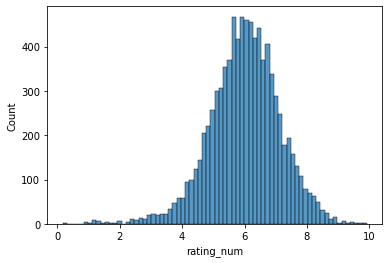

In [101]:
sns.histplot(data=commit, x="rating_num")

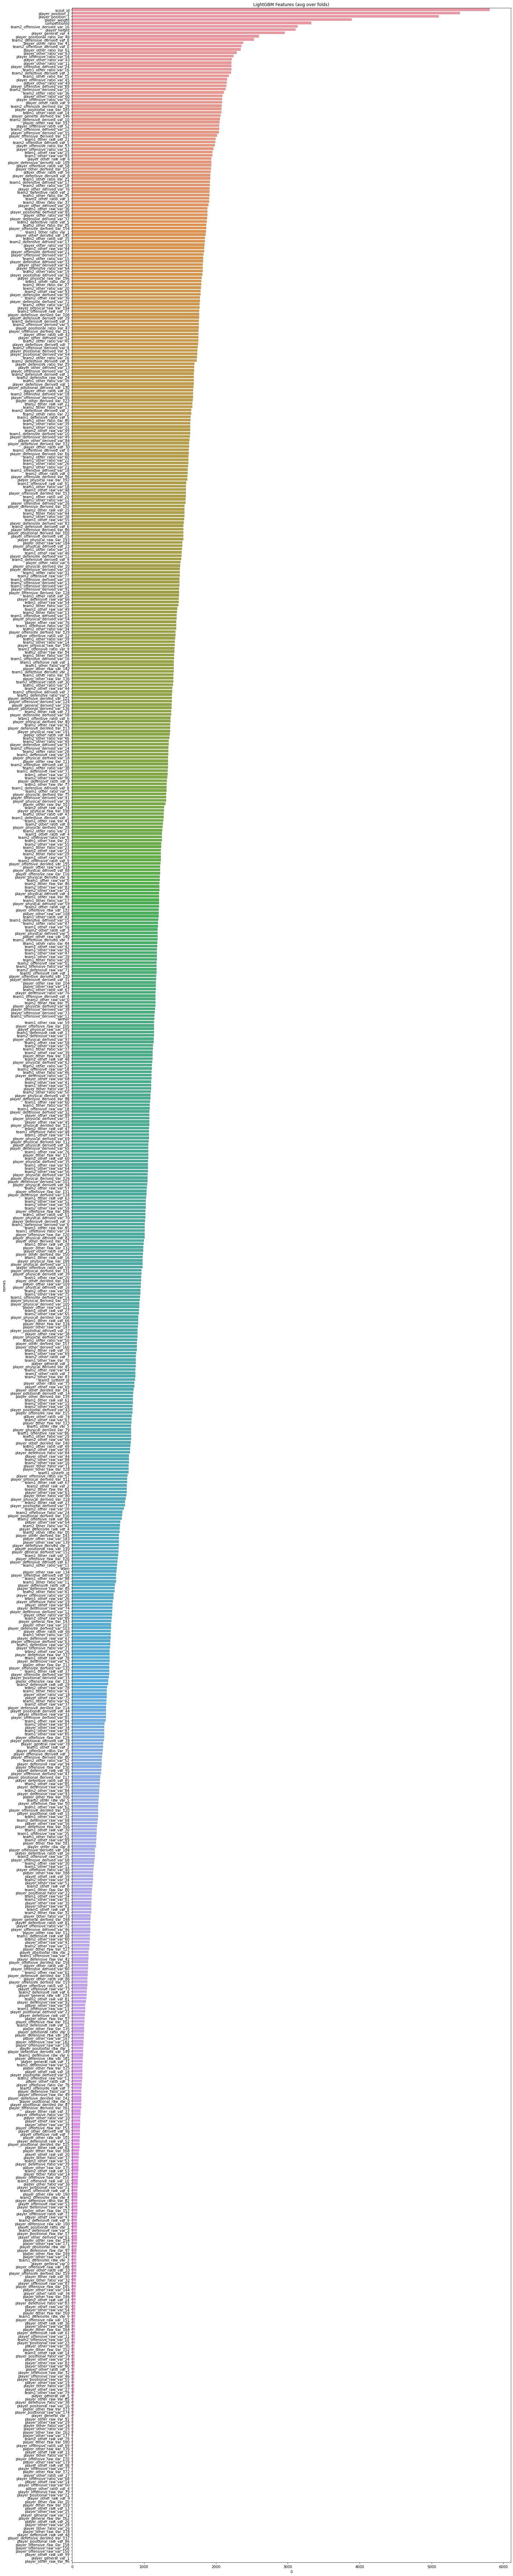

In [102]:
# feature importance
#np.mean(np.array(feature_importance),axis=0)
df_ft = pd.DataFrame(np.mean(np.array(feature_importance),axis=0))
df_ft['nomes'] = nomes
list(df_ft)
plt.figure(figsize=(20, 100))
sns.barplot(x=0, y="nomes", data=df_ft.sort_values(by=0, ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [103]:
len(df_ft)

772

In [104]:
%time shap_values = shap.TreeExplainer(gbm).shap_values(test_data[:1000,:] ) 

NameError: name 'shap' is not defined